<a href="https://colab.research.google.com/github/amrutarothe2812/Daltix/blob/master/da_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Daltix Data Analyst Challenge**
In this challenge you will explore a subset of data that mirrors (in a simplified manner) some of the data we work with at Daltix.  
The goal of this challenge is to explore the data we provide and share all insights you find relevant in a business-friendly manner.
  
Some tips:
* Imagine you are presenting these to both technical and non-technical members of your company. 
* Take into consideration that the code you produce should be readable and reusable by a colleague in the future.


**Good luck**! 😀

> The Daltix Team
______________

### The Challenge starts here

In [0]:
import pandas as pd
import pandasql as ps
from pandasql import sqldf
# ...

______________
## 1. Extract the data
**Description**

In this section you will focus on importing the files from the dataset that was provided and do a simple QA of the data.
  
After completing it you should be have all 4 tables locally available.

_Question:_
* Did you notice any quality issues with the files we provided? If so, can you list them? How did you deal with them? 

The product.csv dataset had *content* column in Json
format. I split the column in 3, approximate_content, content_unit and content_value respectively.


In [5]:
# Import product.csv and format the columns
import pandas.io.json as json

productDf = pd.read_csv('product.csv')

productDf.contents = productDf.contents.str.replace('\n', '')

productDf = productDf.join(json.json_normalize(productDf['contents'].map(json.loads).tolist())).drop(['contents'], axis=1)
productDf.head()

,daltix_id,product_id,article_nr,shop,country,name,brand,eans,approximate_content,content_unit,content_value
0,001b94cf378a9827f698393795988539bdc1909a70674d...,832766,2474959.0,shop4,be,Nivea sun SOS Aftersun herstel. 200ml,Nivea sun,NaN,false,ml,200
1,002c30e9451e4f42283545ba979ac8a7f807668e85c55a...,3263396,158087.0,shop3,be,BRABANTIA Tasty ijsschep munt,BRABANTIA,NaN,NaN,NaN,NaN
2,005d13004d634e1eb2e384239d0f328bc8ec445556b6c6...,10763,3816367.0,shop4,be,Boerinneke hagelslag suikervrij 200g,Boerinneke,"[\n ""05411146223898""\n]",false,g,200
3,005eb33441fd41c81ba3bced9ab90e48b71fafcfe18f0e...,6479,NaN,shop1,nl,Slips of strings,NaN,NaN,false,pack,2
4,00622df3e2f6236a5f09e44b400acaaaec363f699d1ef4...,4024160,5287.0,shop3,be,BONI Torpedo RaketStarship,BONI,"[\n ""05400141240870""\n]",false,ml,600


Import category dataset. This dataset had invalid and special characters in the *categories* column.

In [6]:
categoryDf = pd.read_csv('category.csv', sep = '|')
#Start of data cleaning
categoryDf['categories'] = categoryDf['categories'].str.replace(r'\n', '') 
categoryDf['categories'] = categoryDf['categories'].str.replace(r'[', '')
categoryDf['categories'] = categoryDf['categories'].str.replace(r']', '')
categoryDf['categories'] = categoryDf['categories'].str.replace('"',"")
categoryDf['categories'] = categoryDf['categories'].str.strip()
#End of data cleaning
categoryDf.head()

,shop,country,daltix_id,categories
0,shop4,be,21da5385ea831537d7c7b5b298f2d7eefbb2ec81413adb...,"Groenten en fruit, Verse groenten, Aarda..."
1,shop1,nl,1095d3a2e7aca5753a104d5d3c1106d0333f20d565f418...,"Onze aanbiedingen, Weekactie v.a. ma. 22-07"
2,shop1,nl,70b4b5051757b3dc4f91463736c6636dcdb9bc02bd262b...,"Onze aanbiedingen, Aanbiedingen v.a. do. 25-07"
3,shop1,nl,55e5629d4fe138d2449d6f39a2b61f0b32d52493decb7e...,"Onze aanbiedingen, Weekendactie v.a. vr. 23-08"
4,shop4,be,1ca5dc935e07f0d85c37f4e0b2e6d61611868d447ece87...,"Lichaamsverzorging/Parfumerie, Zonneproduct..."


Import Price dataset

In [7]:
priceDf = pd.read_csv('price.csv')
priceDf.head()

,daltix_id,shop,country,product_id,location,price,unit_std,date
0,0000ba625520cd774f3fc738e27d9d2beb795995c99c38...,shop4,be,888810,ans,14.99,su,2019-10-09
1,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ans,1.75,su,2019-08-07
2,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ans,1.75,su,2019-10-07
3,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ans,7.00,kg,2019-10-03
4,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ledeberg,6.84,kg,2019-08-10


Import promotion dataset

In [8]:
promoDf = pd.read_csv('promo.csv')
promoDf.head()

,daltix_id,shop,country,location,promo_type,dlevel,date
0,d264f89c1d56a03ac2ad1fb79c2f58f246b4eb00f39647...,shop3,be,ledeberg,Price cut with MinAmount Condition,0.200000,2019-09-04
1,0868046f91601046f805187f8f029af152634724d42483...,shop4,be,ledeberg,Price cut with MinAmount Condition,0.300000,2019-08-11
2,eab88f8cf357d31f139762dad0c481b5cd7a8e6c7ace93...,shop3,be,ledeberg,Price cut with MinAmount Condition,0.333400,2019-09-19
3,edb8f9fbdfa192377bb54362166e4ddc422db6bc94bad9...,shop4,be,ans,Price cut with MinAmount Condition,0.300000,2019-08-17
4,954ebce9a5c18db4e9b67407c3447c433a88f30b67217f...,shop3,be,ans,Price cut with MinAmount Condition,0.097674,2019-08-21


_____________________
## 2. Explore the dataset

**Requirements:**
Use `pandasql` to query the tables and explore the dataset

**Description**

In this section you are free to explore the data however you like in order get to know your dataset. It's meant to be exploratory and only for you to get familiar with the data.

At the end of this section you should be able to, at least, answer the following questions:
* For which time interval you have prices for?
* How many shops are comprised in the dataset?
* How many different products are there per shop in the dataset?
* Can a product have more than 1 active promotion at the same time? 

You are free (and __encouraged__) to further describe the dataset as you see fit.

* For which time interval you have prices for?

  `2019-08-01 to 2019-10-15`

In [10]:
q1 = """SELECT min(date) Start_Date, max(date) End_Date FROM priceDf"""
Date_Range = sqldf(q1)
print(Date_Range.to_string(index=False))

 Start_Date    End_Date
 2019-08-01  2019-10-15


* How many shops are comprised in the dataset?

    `4`

In [11]:
q2 = """SELECT COUNT(DISTINCT shop) AS Shops FROM productDf"""
No_of_shops = sqldf(q2)
print(No_of_shops.to_string(index=False))

 Shops
     4


* How many different products are there per shop in the dataset?


In [12]:
q3 = """SELECT shop, COUNT(DISTINCT product_id) AS Products FROM productDf
GROUP BY 1
ORDER BY 1 ASC"""
Products_per_shop = sqldf(q3)
print(Products_per_shop.to_string(index=False))

  shop  Products
 shop1      1896
 shop2         6
 shop3       807
 shop4      1369


* Can a product have more than 1 active promotion at the same time?

Yes, there were `65` products with more than 1 active promotion at the same time.


In [13]:
q4 = """WITH Step1 AS 
(SELECT product_id, date, COUNT(DISTINCT promo_type) AS Promos FROM 
(SELECT a.product_id, b.promo_type, b.date FROM productDf a INNER JOIN promoDf b ON a.daltix_id = b.daltix_id
GROUP BY 1,2,3
ORDER BY 1 ASC) 
GROUP BY 1,2
ORDER BY 3 DESC)

SELECT COUNT(DISTINCT product_id) AS Products FROM Step1
WHERE Promos > 1
"""
Promo = sqldf(q4)
print(Promo.to_string(index=False))

 Products
       65


___________________________
## 3 Transformation & Manipulation

__Description__

In this section you should use the tables provided in the dataset and manipulate them to find valuable business insights.

Some questions you should be able to answer:
* Which shops have a bigger overlap in their assortment?
* Which shop has the overall cheapest assortment? What about cheapest categories?
* Which shop is the "_king_" of promotions?
* Where would you do your shopping? When? Why?
* Can you spot any weird price behaviour? 

The questions above are just some example questions. You should provide any insights you find useful/relevant.

_Note:_
* Use this section as a prepation for the next!

* Which shop is the "king" of promotions?

  Shop 4 had the highest discount of `33.73%` on an average 


In [14]:
#King of promotion
q5 = """SELECT shop, AVG(dlevel) AS Discount  FROM promoDf
GROUP BY 1 
ORDER BY 2 DESC
LIMIT 1
"""
King_of_Promotion = sqldf(q5)
print(King_of_Promotion.to_string(index=False))

  shop  Discount
 shop4  0.337344


___________________
## 4. Visualization

__Description__

Imagine you are presenting the insights you found to your team, which include fellow data analysts, data scientists and business colleagues.

Present your findings on the insights you've discovered so far. 

Text(0.5, 1.0, 'Top 5 most expensive Products')

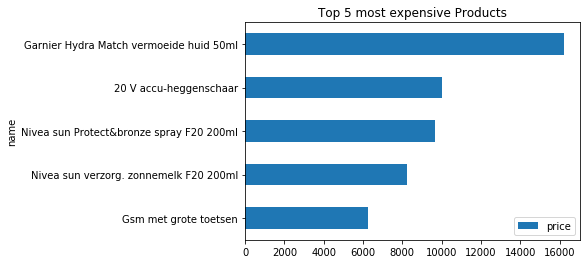

In [16]:
#Visualisation
viz1 = """SELECT name, price FROM
(SELECT a.name, b.price
FROM productDf a INNER JOIN priceDf b ON a.daltix_id = b.daltix_id
WHERE a.name IS NOT NULL
GROUP BY 1,2
ORDER BY 2 DESC)
LIMIT 5
"""
expensive_products = sqldf(viz1)
#expensive_products.name = expensive_products.name.str[:15]
ax = expensive_products.sort_values('price', ascending = True).plot.barh(x='name', y='price')
ax.set_title('Top 5 most expensive Products' )

___________________
## 5. Discussion

__Description__

Take some time to prepare some up-coming questions!

* If given more time, how would you further refine your analysis? 
* What other information would you like to have to provide more valuable insigths?

#### ANSWER HERE
> If given time, I would explore in depth about the products and units sold. Also, if the data had time of day purchase, we can see at what time the customers shop most. This will help the shops to create `Rush Hour` shopping deals. 

I would look into the seasonality of data if given a broader purchase time frame. It is possible that the purchase of products vary in different times of the year.

___________________
## 6. Bonus question

__Description__

You now have access to the nutritional values of some products:
* **nutri_tbl.csv** - https://daltix-public-interviews.s3-eu-west-1.amazonaws.com/data-analyst-challenge/nutri.csv

Assuming that you have to consume between 2200 kcal and 2700 kcal per day, build a basket of 15 products for a [ketogenic diet](https://en.wikipedia.org/wiki/Ketogenic_diet). Where can we buy that basket for the cheapest price? 

__IMPORTANT__:
This is an extra question that you should only focus one if you have time. 
We will only consider your answer if you solved all the previous sections.

In [0]:
# code here